***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv("dados/PNAD.csv")

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
intervalos = [dados.Renda.min(),2 * 788 , 5 * 788, 15 * 788, 25* 788, 200000]
intervalos

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda, bins = intervalos, labels = labels, include_lowest = True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
percentual = pd.value_counts(pd.cut(x = dados.Renda, bins = intervalos, labels = labels, include_lowest= True), 
                             normalize = True) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [56]:
dist_frequencia_percent = pd.DataFrame({'Frequencia': frequencia,
                                       'Percentual': percentual})
dist_frequencia_percent = dist_frequencia_percent.sort_index(ascending = False)
dist_frequencia_percent

,Frequencia,Percentual
Um salário ou menos,NaN,22182.0
E,49755.0,NaN
D,18602.0,NaN
C,7241.0,NaN
B,822.0,NaN
A,420.0,NaN


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:xlabel='Frequencia', ylabel='Count'>

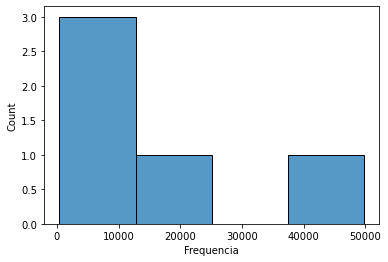

In [57]:
sns.histplot(x = dist_frequencia_percent.Frequencia)

> ### Conclusões
Coletando informações do Dataframe, observamos que há uma grande concentração de renda entre as classes mais baixas D & E
Enquanto a partir delas há pouca concentração, sendo pouco representada sendo menos de 2% se somados A e B

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

C:\Users\walli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de frequencia - Altura')

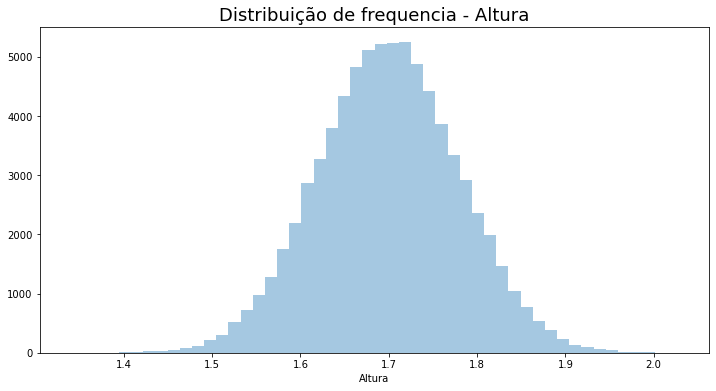

In [10]:
ax = sns.distplot(dados.Altura, kde = False)
ax.figure.set_size_inches(12,6)
ax.set_xlabel("Altura")
ax.set_title("Distribuição de frequencia - Altura", fontsize = 18)

<AxesSubplot:>

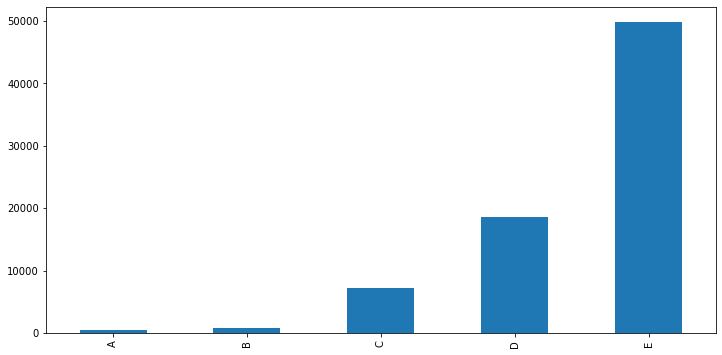

In [11]:
dist_frequencia_percent['Frequencia'].plot.bar(figsize= (12,6))

Text(0.5, 1.0, 'Distribuição de Renda abaixo de 20 mil reais')

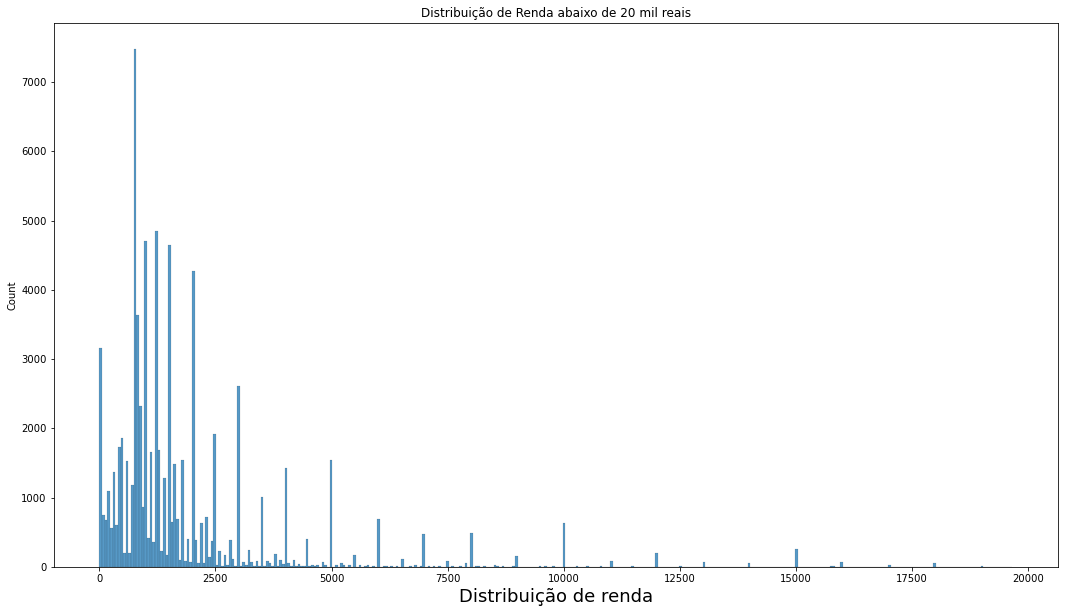

In [12]:
ax = sns.histplot(x = dados.query("Renda < 20000").Renda)
ax.figure.set_size_inches(18,10)
ax.set_xlabel("Distribuição de renda", fontsize = 18)
ax.set_title("Distribuição de Renda abaixo de 20 mil reais")

> ### Conclusões
Como mensionado anteriormente, a distribuição entre as classes D e E representa 88.9 % da renda salarial,
demonstrando uma má distribuição de renda e consequentemente concentrando a pobreza em uma massa gigantesca
representando por gráfico, essa distribuição de renda se concentra na faixa de 1 salário mínimo até 3 salários mínimos

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

Text(0.5, 1.0, 'Distribuição de Renda abaixo de 20 mil reais')

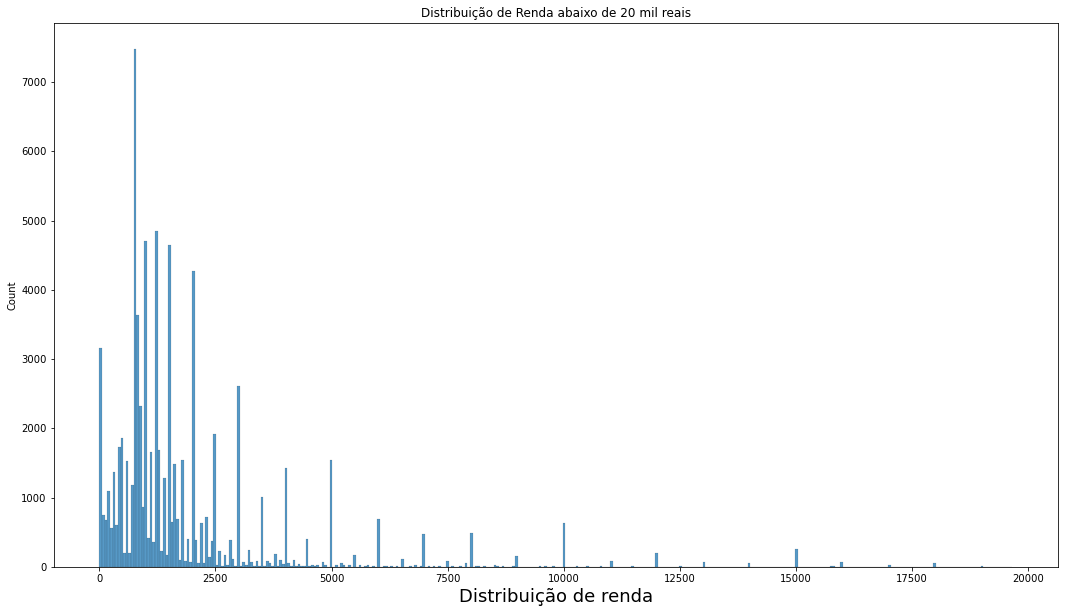

In [13]:
ax = sns.histplot(x = dados.query("Renda < 20000").Renda)
ax.figure.set_size_inches(18,10)
ax.set_xlabel("Distribuição de renda", fontsize = 18)
ax.set_title("Distribuição de Renda abaixo de 20 mil reais")

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [15]:
dist_frequencia = pd.crosstab(dados.Sexo, dados.Cor)
dist_frequencia.rename(index = sexo, columns = cor, inplace = True)
dist_frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [16]:
dist_frequencia_percent = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
dist_frequencia_percent.rename(index = sexo, columns = cor, inplace = True) 
dist_frequencia_percent

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões
A distribuição de demonstra um pouco mais do dobro de homens que são responsáveis por seu domicílio
Além disso, há uma concentração maior de Pardos seguindo por Brancos, onde pardos e pretos a grande maioria são homens

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [17]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [18]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [19]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [20]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [21]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [22]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [23]:
var1 = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = ['mean', 'median','max'], values = dados.Renda)
var1.rename(index = sexo, columns = cor, inplace = True)
var1

mean                                                      \
Cor           Indígena       Branca        Preta      Amarela        Parda   
Sexo                                                                         
Masculino  1081.710938  2925.744435  1603.861687  4758.251064  1659.577425   
Feminino   2464.386139  2109.866750  1134.596400  3027.341880  1176.758516   

            median                                      max                 \
Cor       Indígena  Branca   Preta Amarela   Parda Indígena  Branca  Preta   
Sexo                                                                         
Masculino    797.5  1700.0  1200.0  2800.0  1200.0    10000  200000  50000   
Feminino     788.0  1200.0   800.0  1500.0   800.0   120000  100000  23000   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino   50000  100000  
Feminino    20000   30000

> ### Conclusões
Média: A renda média com exceção da Cor Indígena, o homem obtém até 50% a mais em relação ao sexo oposto,
além disso, o salário médio tem uam grande elevação a Cor Amarela e Branca, chegando a ser o dobro em alguns casos.
Mediana: A mediana a Cor Amarela continua tendo uma renda muito acima da média em relação até mesmo ao sexo feminino,
nos demais sexos e cores há um equilíbrio maior
Máximo: Há uma diferença grande nos salários altos, sendo considerado um outlier o salário da indígena

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [24]:
medida_dispersao = pd.crosstab(dados.Sexo, dados.Cor, aggfunc= ['mad', 'var', 'std'], values =dados.Renda)
medida_dispersao.rename(index = sexo, columns = cor, inplace = True)
medida_dispersao

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                                  std                                        \
Cor               Parda      Indígena       Branca        Preta     Amarela   
Sexo                                                                          
Masculino  5.345747e+06   1204.093490  4750.791872  1936.309271  5740.82482   
Feminino   2.547960e+06  11957.498292  3251.013154  1349.799809  3731.17366   

                        
Cor              Parda  
Sexo                    
Masculino  2312.087184  
Feminino   1596.233048

> ### Conclusões
MAD(Desvio médio absoluto):

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

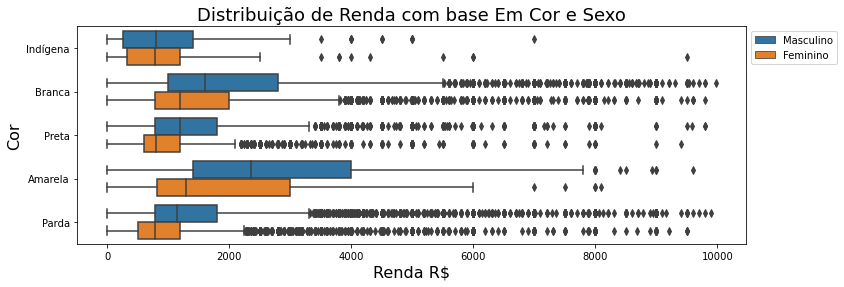

In [75]:
ax = sns.boxplot(x = 'Renda', y  = 'Cor', hue = 'Sexo', data = dados.query("Renda < 10000"), orient = 'h')
ax.figure.set_size_inches(12,4)
ax.set_xlabel("Renda R$",  fontsize = 16)
ax.set_ylabel("Cor", fontsize = 16)
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'])
ax.set_title("Distribuição de Renda com base Em Cor e Sexo", fontsize = 18)
handles, _ = ax.get_legend_handles_labels()   
ax.legend(handles, ['Masculino', 'Feminino'], loc="best", bbox_to_anchor = (1,1))

> ### Conclusões

> A distribuição de renda tem maiores valores se concentrando entre brancos e asiáticos, além de que notoriamente mulheres recebem menos que homens em todos etinias

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [82]:
from scipy import stats
percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print(f"{percentual:.2f} %")

28.87 %


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [85]:
valor = dados.Renda.quantile(.99)
print(valor)

15000.0


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [87]:
medidas_estatisticas_renda = pd.crosstab(dados['Anos de Estudo'], dados.Sexo, aggfunc = ['mean', 'median', 'max', 'std'], values = dados.Renda)
medidas_estatisticas_renda.rename(columns = sexo, inplace = True)
medidas_estatisticas_renda

mean                 median                max  \
Sexo              Masculino     Feminino Masculino Feminino Masculino   
Anos de Estudo                                                          
1                799.494638   516.201748       700      390     30000   
2                895.629047   492.771987       788      400     30000   
3                931.178986   529.911638       788      450     40000   
4               1109.203862   546.853916       800      500     80000   
5               1302.329283   704.279111      1000      788     50000   
6               1338.653218   781.389776      1045      788     35000   
7               1448.875419   833.732824      1200      788     25000   
8               1465.497940   830.751004      1200      788     40000   
9               1639.396667   933.615351      1300      800     30000   
10              1508.038850   868.021700      1200      788     60000   
11              1731.270847   925.919225      1218      800     45000   
12              2117.060504  1286.790889      1500     1000    200000   
13              2470.330776  1682.313725      1800     1200     30000   
14              3195.099154  1911.730047      2400     1300     25000   
15              3706.620269  2226.460457      2500     1600     50000   
16              6134.279790  3899.513231      4000     2800    200000   
17              1295.761905   798.174419      1200      788      7000   

                                 std               
Sexo           Feminino    Masculino     Feminino  
Anos de Estudo                                     
1                 10000  1023.904884   639.311534  
2                  2000  1331.950552   425.291842  
3                  4000  1435.173827   498.234168  
4                  3500  2143.800133   424.124446  
5                 10000  1419.821787   629.553397  
6                  8000  1484.650587   635.782641  
7                  6000  1476.628602   574.547028  
8                  9000  1419.708673   602.038029  
9                 18000  1515.583715   896.781213  
10                20000  2137.664774   973.221652  
11                 6000  2078.609734   620.611907  
12               100000  2676.538942  1819.040417  
13               120000  2268.081538  4851.833513  
14                20000  2797.116800  2053.789771  
15                20000  3987.214974  2064.083336  
16               100000  7447.613594  4212.770709  
17                 3000   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

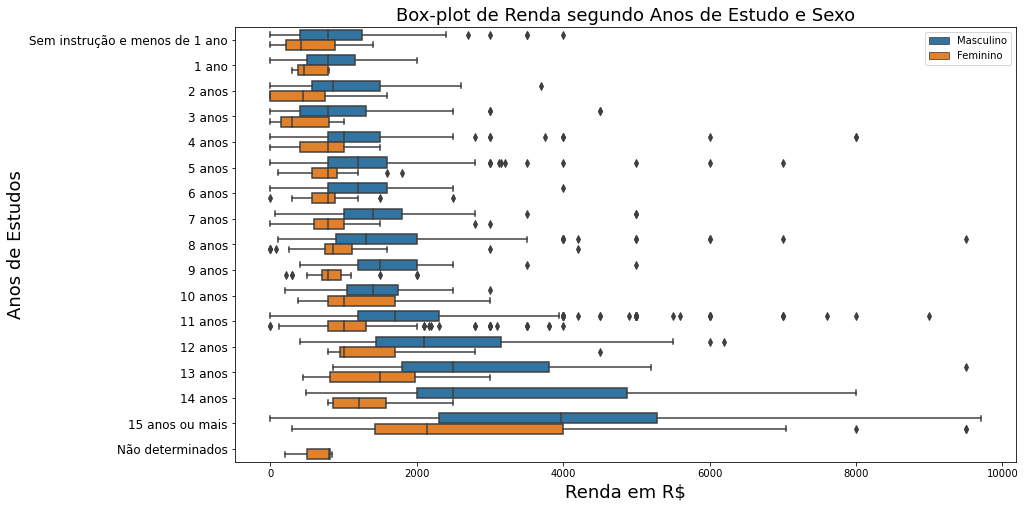

In [105]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query("Renda < 10000 and Idade == 40"), orient = 'h')
ax.figure.set_size_inches(14,8)
ax.set_xlabel("Renda em R$", fontsize = 18)
ax.set_yticklabels([i for i in anos_de_estudo.values()], fontsize = 12)
ax.set_ylabel("Anos de Estudos", fontsize = 18)
ax.set_title("Box-plot de Renda segundo Anos de Estudo e Sexo", fontsize = 18)
handles, _ = ax.get_legend_handles_labels()   
ax.legend(handles, ['Masculino', 'Feminino'], loc="best", bbox_to_anchor = (1,1))

> ### Conclusões
A renda é maior para homens independente dos anos de estudos, em alguns casos igual 17 anos o estudo é totalmente feminino porém a renda é muito baixa

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [109]:
unidades_da_federacao = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
unidades_da_federacao.rename(index = uf, inplace = True)
unidades_da_federacao

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'Renda por UF (Estado)'}, xlabel='Renda por Estado R$', ylabel='Estados'>

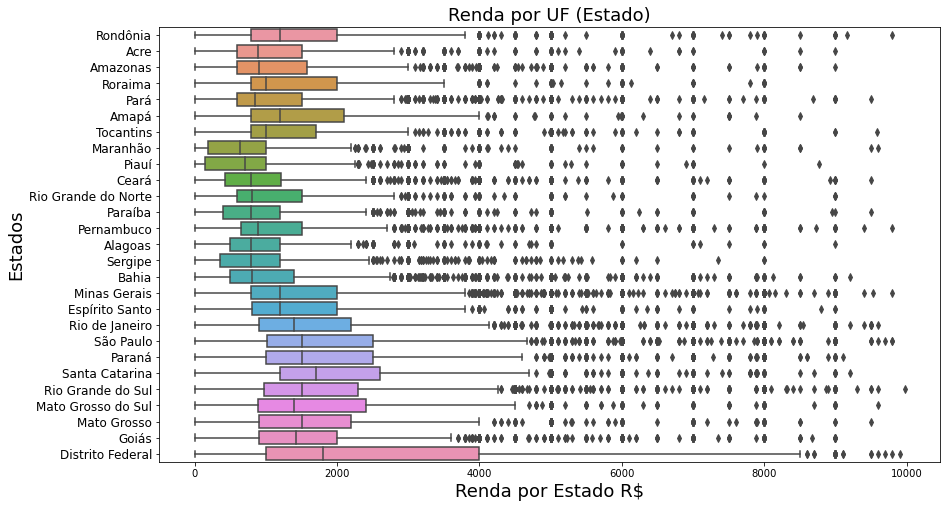

In [123]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query("Renda < 10000"), orient = 'h')
ax.figure.set_size_inches(14,8)
ax.set_xlabel("Renda por Estado R$", fontsize = 18)
ax.set_ylabel('Estados', fontsize = 18)
ax.set_title("Renda por UF (Estado)", fontsize = 18)
ax.set_yticklabels([key for key in uf.values()], fontsize = 12)
ax

> ### Conclusões
O DF lidera com uma grande margem a maior renda por casa, e os estados mais pobres são concentrados na maioria na região do nordeste